# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 70 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 30 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [4]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [5]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [6]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [7]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [8]:
dftsa = []
for i in tsa.columns:
    dftsa.append([i, tsa[i].dtypes, 
                     tsa[i].isna().sum(), 
                     round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                     tsa[i].drop_duplicates().count(), 
                     tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(dftsa, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2007112335345, 2007050825086]"
1,Date Received,object,70,0.14,3522,"[22-Jan-14, 19-Aug-11]"
2,Incident Date,object,570,1.12,10788,"[7/8/2013 15:15, 6/9/2006 0:00]"
3,Airport Code,object,2052,4.02,405,"[LBB, EAT]"
4,Airport Name,object,2052,4.02,419,"[Stockton, TSA - Non-Specified Airport]"
5,Airline Name,object,8555,16.75,243,"[Air Inter Europe, Turkish Airlines]"
6,Claim Type,object,1960,3.84,8,"[nan, Employee Loss (MPCECA)]"
7,Claim Site,object,190,0.37,6,"[Checkpoint, nan]"
8,Item,object,1012,1.98,1854,[Batteries - Dry cell only; Clothing - Shoes; ...
9,Claim Amount,object,992,1.94,13248,"[$751.87 , $585.75 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object

In [9]:
def replace(object):
    for i in tsa.columns:
        for j in range(len(tsa)):
            if tsa[i].iloc[j] == object:
                tsa[i].iloc[j] = np.nan
            else:
                continue
                
replace('-')

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [10]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [11]:
error_column = []
for i in range(len(tsa)):
    try:
        pd.to_datetime(tsa['Incident Date'].iloc[i])
    except ValueError :
        error_column.append(tsa.iloc[i])

In [12]:
dferror = pd.DataFrame(error_column)
dferror

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
for i in range(len(tsa)):
    try:
        pd.to_datetime(tsa['Incident Date'].iloc[i])
    except ValueError :
        tsa['Incident Date'][i] = '{}{} {}'.format(tsa['Incident Date'][i][0:7],tsa['Date Received'].iloc[i].year,tsa['Incident Date'][i][12:])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [15]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [16]:
error_column = []
for i in range(len(tsa)):
    try:
        pd.to_datetime(tsa['Incident Date'].iloc[i])
    except ValueError :
        error_column.append(tsa.iloc[i])

Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [17]:
daydifference = []
for i in range(len(tsa)):
    daydifference.append(tsa['Date Received'].iloc[i] - tsa['Incident Date'].iloc[i])
tsa['Day Difference'] = daydifference
    

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

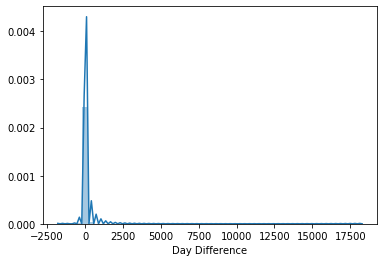

In [18]:
tsa_new = tsa.dropna()
sns.distplot(tsa_new['Day Difference'].dt.days)

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

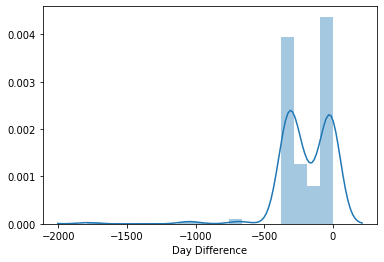

In [19]:
day1 = tsa_new['Day Difference'].dt.days
sns.distplot(day1[day1<0])

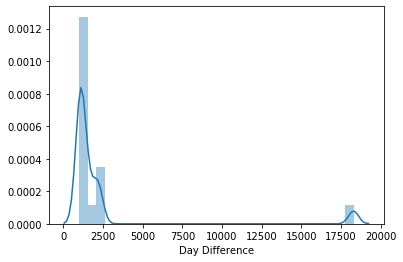

In [20]:
sns.distplot(day1[day1>1000])

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [21]:
tsa_new['Day Difference New'] = tsa_new['Day Difference'].dt.days
tsa_thousands = tsa_new[tsa_new['Day Difference New']>1000]
tsa_thousands['Claim Type'].value_counts()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Passenger Property Loss    9
Property Damage            5
Personal Injury            1
Passenger Theft            1
Name: Claim Type, dtype: int64

In [22]:
tsa_new['Day Difference New'] = tsa_new['Day Difference'].dt.days
tsa_thousands = tsa_new[tsa_new['Day Difference New']>1000]
tsa_thousands['Airline Name'].value_counts()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Delta Air Lines         5
UAL                     4
American Airlines       2
USAir                   1
Northwest Airlines      1
Continental Airlines    1
American Eagle          1
Southwest Airlines      1
Name: Airline Name, dtype: int64

In [23]:
tsa_thousands = tsa_new[tsa_new['Day Difference New']>1000]
tsa_thousands['Item'].value_counts()

Other                                                           3
Clothing - Shoes; belts; accessories; etc.                      2
Currency                                                        2
Luggage (all types including footlockers)                       2
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.    1
Lighters - (cigar; cigerette; etc.); Other                      1
Medicines                                                       1
Audio - Other (Phonograph; cassettes; etc)                      1
PDA - Personal Data Assistants                                  1
Locks                                                           1
Jewelry - Fine                                                  1
Name: Item, dtype: int64

In [24]:
tsa_thousands = tsa_new[tsa_new['Day Difference New']>1000]
tsa_thousands['Close Amount'].value_counts()

$0.00       10
$243.50      1
$58.25       1
$30.00       1
$12.72       1
$71.25       1
$100.00      1
Name: Close Amount, dtype: int64

In [25]:
tsa_thousands = tsa_new[tsa_new['Day Difference New']>1000]
tsa_thousands['Disposition'].value_counts()

Deny               10
Approve in Full     4
Settle              2
Name: Disposition, dtype: int64

###  - from the information above shows that most of them was property loss, maybe the passenger that claim over 1000 days did not aware that they things was lost in the fisrt place based on claim type and from the item feature, we can see that most of the item was not very expensive (also based on close amount) that is why the passenger did not aware of it



In [26]:
tsa_lesszero = tsa_new[tsa_new['Day Difference New']<0]
tsa_lesszero['Airline Name'].value_counts()

American Airlines                33
UAL                              30
Continental Airlines             27
Delta Air Lines                  26
USAir                            24
Southwest Airlines               20
Northwest Airlines               16
Jet Blue                          9
Frontier Airlines                 6
AirTran Airlines                  6
Alaska Airlines                   4
Hawaiian Airlines                 3
Skywest Airlines Inc USA          2
America West                      2
USA 3000 (U5)                     2
Qantus Airways                    2
American West                     2
US Express                        1
Air Tran Airlines(do not use)     1
British Airways                   1
Air Canada                        1
Spirit Airlines                   1
Mexicana                          1
Tower Air                         1
Aloha Airlines                    1
American Eagle                    1
Scandinavian Airlines Systems     1
ATA Aerocondor              

In [27]:
tsa_lesszero = tsa_new[tsa_new['Day Difference New']<0]
tsa_lesszero['Close Amount'].value_counts()

$0.00         130
$50.00          9
$100.00         3
$303.09         2
$150.00         2
$40.00          2
$10.00          2
$60.00          2
$75.00          2
$504.99         1
$58.00          1
$95.00          1
$42.00          1
$600.00         1
$38.56          1
$159.00         1
$200.00         1
$110.49         1
$46.00          1
$45.48          1
$103.93         1
$35.00          1
$170.00         1
$172.45         1
$65.00          1
$29.00          1
$2;382.00       1
$50.69          1
$500.00         1
$33.75          1
             ... 
$115.00         1
$602.35         1
$34.95          1
$84.05          1
$21.32          1
$116.06         1
$125.00         1
$82.50          1
$531.00         1
$77.99          1
$94.98          1
$84.25          1
$94.51          1
$148.39         1
$163.22         1
$755.62         1
$72.50          1
$90.00          1
$19.50          1
$268.61         1
$8.95           1
$791.80         1
$39.99          1
$26.00          1
$19.28    

In [28]:
tsa_lesszero = tsa_new[tsa_new['Day Difference New']<0]
tsa_lesszero['Airport Name'].value_counts()

Phoenix Sky Harbor International                    12
Newark International Airport                        12
Miami International Airport                         11
Los Angeles International Airport                   10
Chicago O'Hare International Airport                 9
LaGuardia                                            9
Philadelphia International Airport                   8
Orlando International Airport                        7
Houston - George Bush Intercontinental Airport       7
Hartsfield-Jackson Atlanta International Airport     7
John F. Kennedy International                        7
Tampa International                                  6
San Diego International                              5
McCarran International                               5
Denver International Airport                         5
Kona International                                   4
Bradley International Airport                        4
Detroit Metropolitan Wayne County Airport            4
Memphis In

### i believe it was a mistake by the Airlines or the Airport since the data above that a several Airlines and Airport have a lot of claims under 0. it means that those AIrlines and Airport have bad claims administration

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [29]:
tsa_claim1 = []
tsa_claim2 = []
tsa_claim5 = []
tsa['Claim Amount'] = tsa['Claim Amount'].astype('str')
for i in range(len(tsa)):
    tsa_claim1.append(tsa['Claim Amount'].iloc[i].replace('$',''))
for i in range(len(tsa)):
    tsa_claim2.append(tsa_claim1[i].replace(';','.'))
for i in range(len(tsa)):
    tsa_claim5.append(tsa_claim2[i].replace('.',''))
tsa['Claim Amount'] = tsa_claim5
tsa['Claim Amount'] = tsa['Claim Amount'].astype('float')
tsa['Claim Amount'] = tsa['Claim Amount'] /100

In [30]:
tsa_claim3 = []
tsa_claim4 = []
tsa_claim6 = []
tsa['Close Amount'] = tsa['Close Amount'].astype('str')
for i in range(len(tsa)):
    tsa_claim3.append(tsa['Close Amount'].iloc[i].replace('$',''))
for i in range(len(tsa)):
    tsa_claim4.append(tsa_claim3[i].replace(';','.'))
for i in range(len(tsa)):
    tsa_claim6.append(tsa_claim4[i].replace('.',''))
tsa['Close Amount'] = tsa_claim6
tsa['Close Amount'] = tsa['Close Amount'].astype('float')
tsa['Close Amount'] = tsa['Close Amount'] /100

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [31]:
tsa_amount_differences = []
for i in range(len(tsa)):
    tsa_amount_differences.append(tsa['Claim Amount'].iloc[i] - tsa['Close Amount'].iloc[i])

In [32]:
tsa['Amount Differences'] = tsa_amount_differences
tsa
# tsa.info()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333 days,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4 days,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,42 days,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40 days,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10 days,1832.22
5,2004050550501,2002-09-11,2002-08-05,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,1200.00,Denied,NaN,Deny,37 days,NaN
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,35 days,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,171.99,Settle,44 days,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,150.00,Denied,0.00,Deny,39 days,150.00
9,21021,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Eyeglasses - (including contact lenses),50000.00,In litigation,NaN,NaN,24 days,NaN


In [33]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333 days,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4 days,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42 days,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40 days,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10 days,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

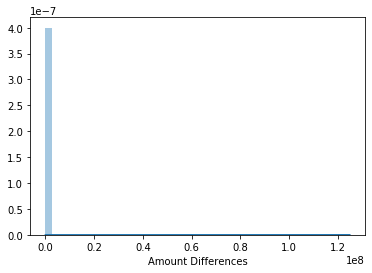

In [34]:
tsa_new2 = tsa.dropna()
sns.distplot(tsa_new2['Amount Differences'])

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [40]:
q1 = tsa['Amount Differences'].quantile(0.25)
q3 = tsa['Amount Differences'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = tsa.loc[(tsa['Amount Differences'] < fence_low) | (tsa['Amount Differences'] > fence_high)]
df_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10 days 00:00:00,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41 days 00:00:00,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33 days 00:00:00,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35 days 00:00:00,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24 days 00:00:00,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23 days 00:00:00,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26 days 00:00:00,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57 days 00:00:00,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16 days 00:00:00,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38 days 00:00:00,11500.00


In [43]:
df_out['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [44]:
df_out['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption? why? Try to explain it with the data 

In [50]:
df_out.mean()

Claim Amount          41645.790505
Close Amount            114.613646
Amount Differences    41531.176858
dtype: float64

In [70]:
df_out.groupby('Status').count()['Claim Amount']

Status
Approved                           2
Canceled                         178
Closed as a contractor claim      60
Denied                          3450
Settled                          413
Name: Claim Amount, dtype: int64

## from mean of the data it shows that there is a big gap between claim amount and close amount and that is why this outlier data has a lot of denied and canceled because the authority tend to doubt the claim.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

# 1.

In [111]:
tsa['Airport Name'].value_counts()

John F. Kennedy International                       2286
Los Angeles International Airport                   1813
Newark International Airport                        1747
Chicago O'Hare International Airport                1712
Orlando International Airport                       1633
Miami International Airport                         1613
Hartsfield-Jackson Atlanta International Airport    1525
Seattle-Tacoma International                        1330
McCarran International                              1278
Phoenix Sky Harbor International                    1267
Philadelphia International Airport                  1143
Ft. Lauderdale-Hollywood International              1032
Washington Dulles International                      981
Dallas-Fort Worth International Airport              854
Tampa International                                  844
Minneapolis/ St.Paul International Airport           807
Houston - George Bush Intercontinental Airport       800
LaGuardia                      

## 2.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard